In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Seleccionamos el csv
raw_df = pd.read_csv('../Data/Transformacion/transformacion2.csv')

In [3]:
# Transformamos los datos de END_DATE a fecha
raw_df.END_DATE = pd.to_datetime(raw_df.END_DATE)

In [4]:
# seleccionamos los años anteriores a 2015 para poder validar
df = raw_df[raw_df.END_DATE < pd.to_datetime('2015', format="%Y")]

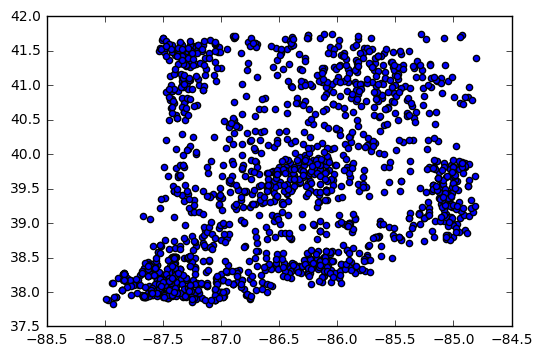

In [5]:
# Imprimimos los episodios
plt.scatter(df['LON'], df['LAT'])
plt.show()

In [6]:
from sklearn.cluster import KMeans

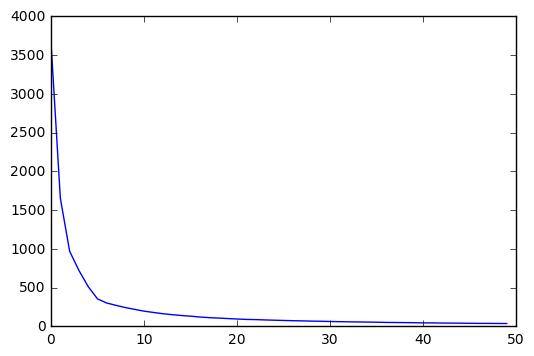

In [7]:
# Hacemos un KMeans para obtener los clusters
init = 'k-means++' 
iterations = 10 
max_iter = 300 
tol = 1e-04


ks = []
for k in range(1, 51):
    km = KMeans(k, n_init = iterations, max_iter= max_iter, tol=tol, init=init)
    labels = km.fit_predict(df[['LON', 'LAT']])
    ks.append(km.inertia_)

plt.plot(ks)
plt.show()

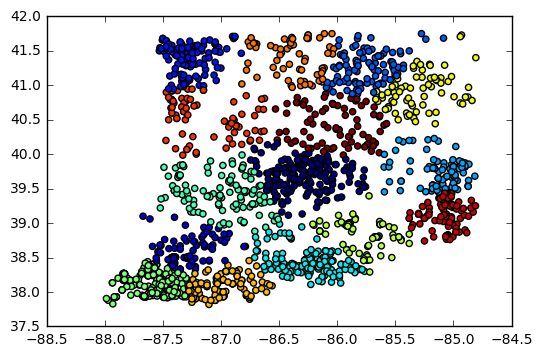

In [8]:
k = 15

km = KMeans(k, n_init = iterations, max_iter= max_iter, tol=tol, init=init)
labels = km.fit_predict(df[['LON', 'LAT']])

plt.scatter(df['LON'], df['LAT'], c = labels)
plt.show()

In [9]:
df['ZONA'] = labels
df.to_csv('../Data/mineria/zonas.csv', index='EPISODE_ID')

/home/jcepeda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
